In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn import svm, datasets
from mlzero.utils.data import shuffle
from mlzero.supervised_learning.support_vector_machine import SupportVectorClassifier, SupportVectorClassifierSGD

In [3]:
# import some data to play with
iris_dataset = datasets.load_iris()

# take the first two features. We could avoid this by using a two-dim dataset
X = iris_dataset.data[:100, :2]
y = iris_dataset.target[:100]
y[y == 0] = -1


X, y = shuffle(X, y)

# create a mesh of points from min to max along X,Y axis
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05), np.arange(y_min, y_max, 0.05))

# SVM Linear kernel

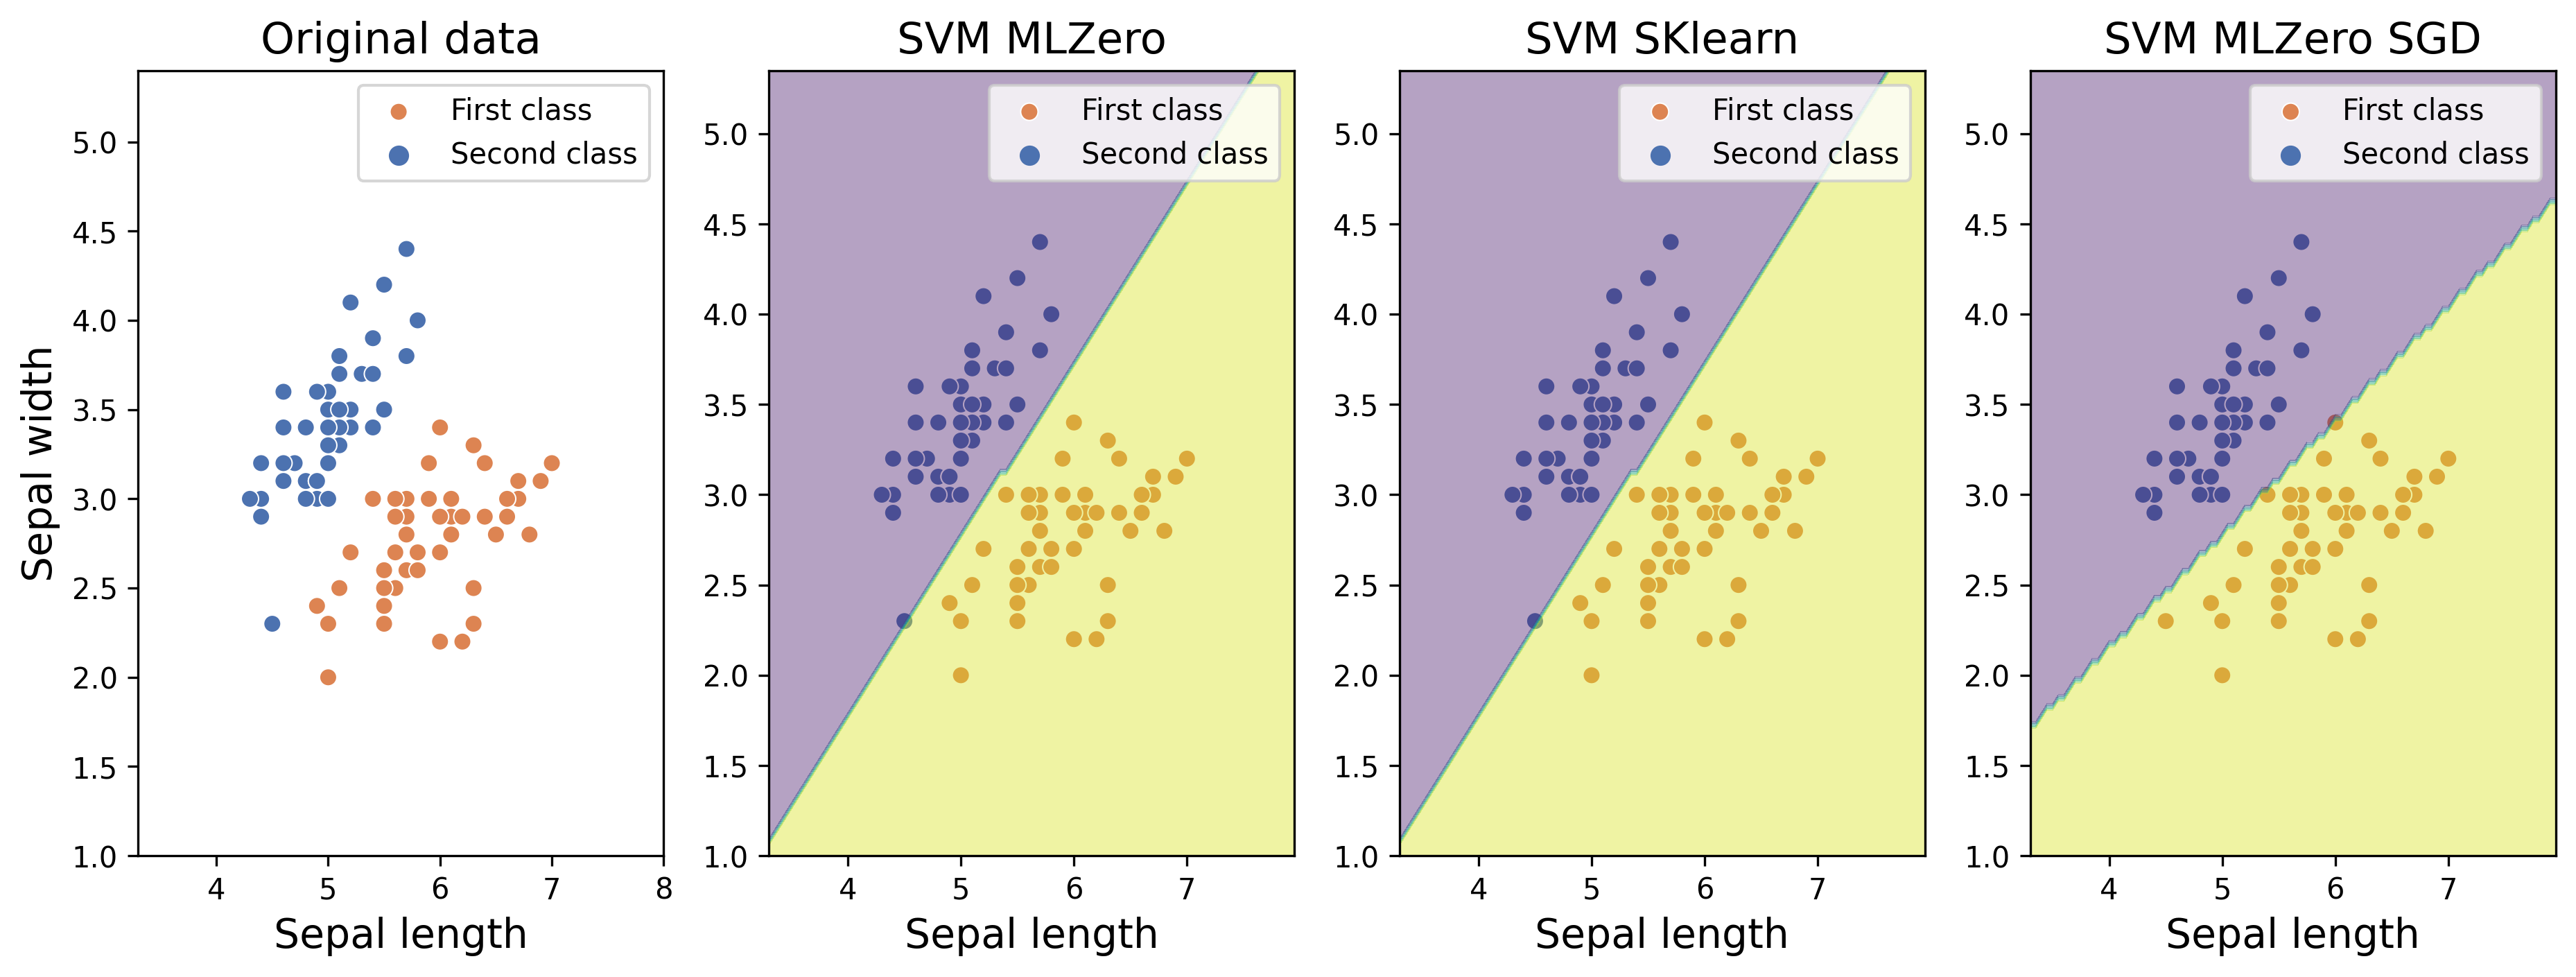

In [5]:
model_mlzero = SupportVectorClassifier().fit(X, y)
model2_mlzero = SupportVectorClassifierSGD().fit(X, y)
model_sklearn = svm.SVC(kernel = 'linear').fit(X, y)


plt.figure(figsize = (15, 5), dpi = 300)

# ----- Original data ----- #

plt.subplot(1, 4, 1)
plt.title('Original data', fontsize = 15)
ax = sns.scatterplot(x = X[:, 0], y = X[:, 1], hue = y, palette="deep")
ax.set_xlabel('Sepal length', fontsize = 14)
ax.set_ylabel('Sepal width', fontsize = 14)
ax.set_xlim((x_min, x_max))
ax.set_ylim((y_min, y_max))
plt.legend(['First class', 'Second class'])


# ----- SVM MLZero ----- #

plt.subplot(1, 4, 2)
plt.title('SVM MLZero', fontsize = 15)
ax = sns.scatterplot(x = X[:, 0], y = X[:, 1], hue = model_mlzero.predict(X), palette="deep")

# plot decision boundaries
Z = model_mlzero.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, alpha=0.4)

ax.set_xlabel('Sepal length', fontsize = 14)
plt.legend(['First class', 'Second class'])


# ----- SVM SKlearn ----- #

plt.subplot(1, 4, 3)
plt.title('SVM SKlearn', fontsize = 15)
ax = sns.scatterplot(x = X[:, 0], y = X[:, 1], hue = model_sklearn.predict(X), palette="deep")

#plot decision boundaries
Z = model_sklearn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, alpha=0.4)

ax.set_xlabel('Sepal length', fontsize = 14)
plt.legend(['First class', 'Second class'])


# ----- SVM MLZERO + SGD ----- #

plt.subplot(1, 4, 4)
plt.title('SVM MLZero SGD', fontsize = 15)
ax = sns.scatterplot(x = X[:, 0], y = X[:, 1], hue = model2_mlzero.predict(X), palette="deep")

# plot decision boundaries
Z = model2_mlzero.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, alpha=0.4)

ax.set_xlabel('Sepal length', fontsize = 14)
plt.legend(['First class', 'Second class'])

# SVM RBF kernel

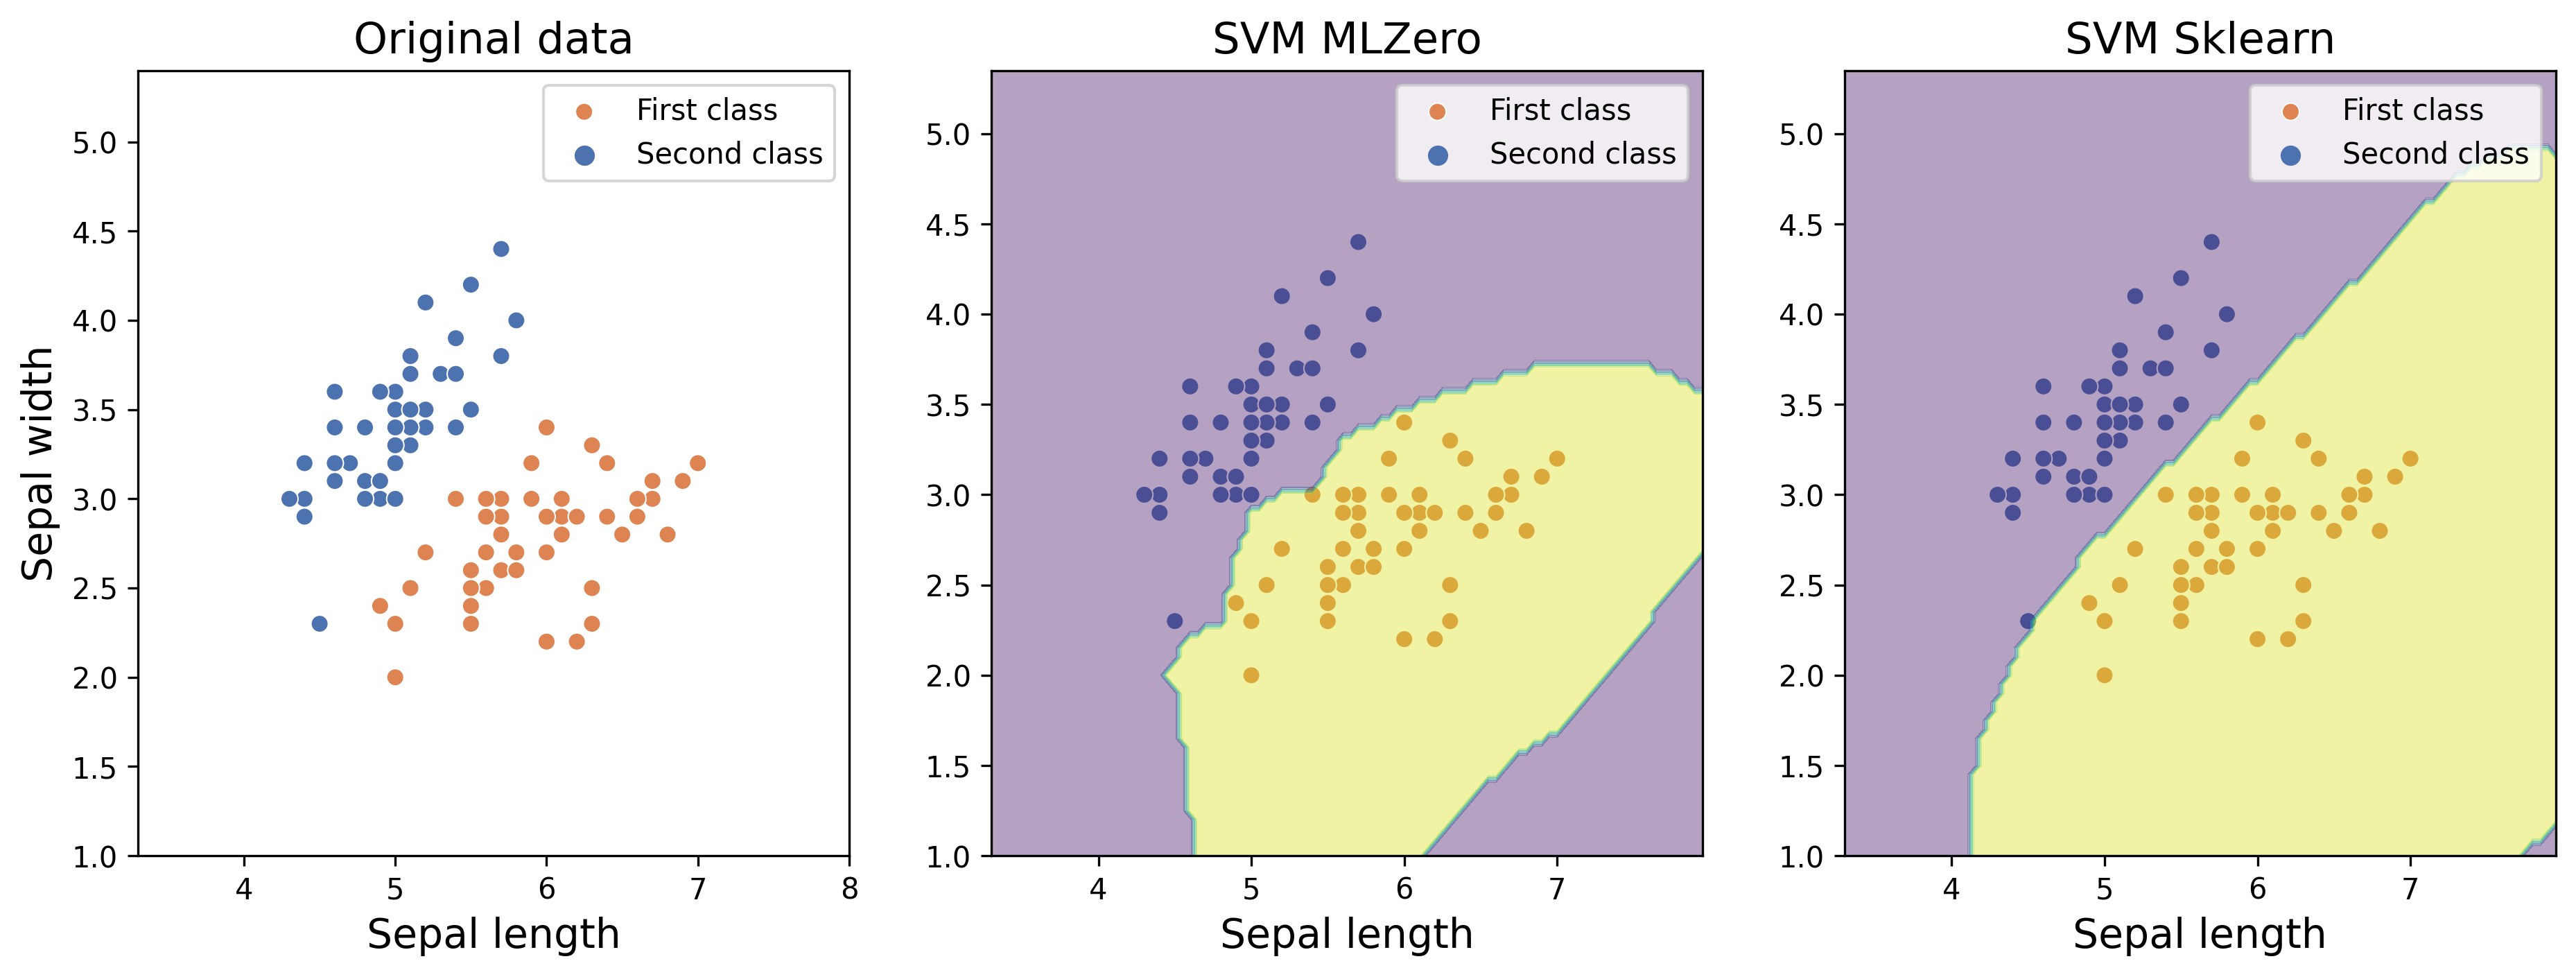

In [6]:
model_mlzero = SupportVectorClassifier(kernel = 'rbf', gamma = 0.7).fit(X, y)
model_sklearn = svm.SVC(kernel = 'rbf', gamma = 0.7).fit(X, y)


plt.figure(figsize = (15, 5), dpi = 300)

plt.subplot(1, 3, 1)
plt.title('Original data', fontsize = 15)
ax = sns.scatterplot(x = X[:, 0], y = X[:, 1], hue = y, palette="deep")
ax.set_xlabel('Sepal length', fontsize = 14)
ax.set_ylabel('Sepal width', fontsize = 14)
ax.set_xlim((x_min, x_max))
ax.set_ylim((y_min, y_max))
plt.legend(['First class', 'Second class'])


plt.subplot(1, 3, 2)
plt.title('SVM MLZero', fontsize = 15)
ax = sns.scatterplot(x = X[:, 0], y = X[:, 1], hue = model_mlzero.predict(X), palette="deep")

#plot decision boundaries
Z = model_mlzero.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, alpha = 0.4)

ax.set_xlabel('Sepal length', fontsize = 14)
plt.legend(['First class', 'Second class'])

plt.subplot(1, 3, 3)
plt.title('SVM Sklearn', fontsize = 15)
ax = sns.scatterplot(x = X[:, 0], y = X[:, 1], hue = model_sklearn.predict(X), palette="deep")

# plot decision boundaries
Z = model_sklearn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, alpha=0.4)

ax.set_xlabel('Sepal length', fontsize = 14)
plt.legend(['First class', 'Second class'])

# SVM Polynomial kernel

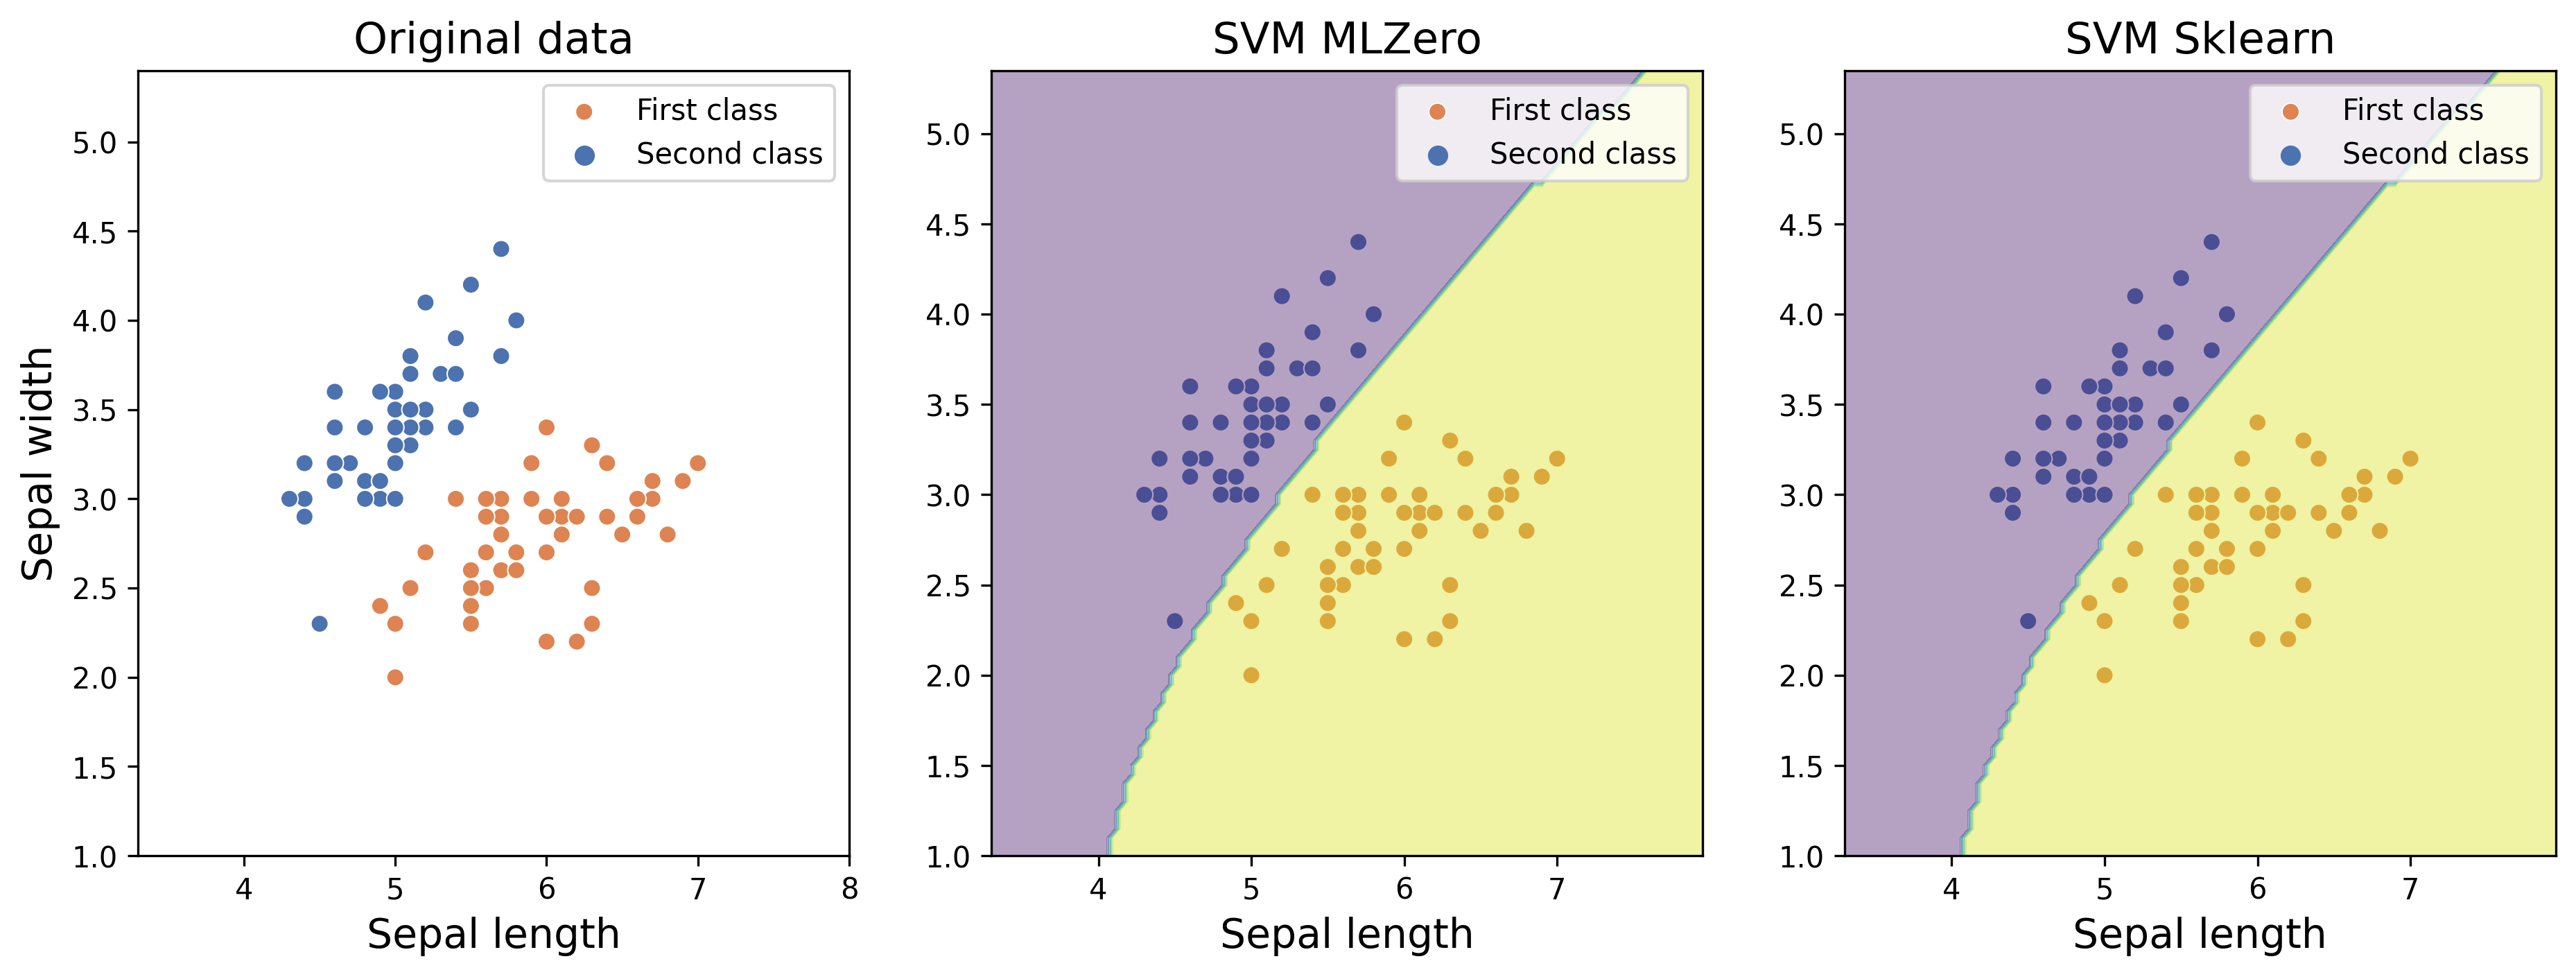

In [7]:
model_mlzero = SupportVectorClassifier(kernel = 'poly', degree=3, gamma = 0.7, C=1.0).fit(X, y)
model_sklearn = svm.SVC(kernel="poly", degree=3, gamma=0.7, C=1.0).fit(X, y)

plt.figure(figsize = (15, 5), dpi = 300)

plt.subplot(1, 3, 1)
plt.title('Original data', fontsize = 15)
ax = sns.scatterplot(x = X[:, 0], y = X[:, 1], hue = y, palette="deep")
ax.set_xlabel('Sepal length', fontsize = 14)
ax.set_ylabel('Sepal width', fontsize = 14)
ax.set_xlim((x_min, x_max))
ax.set_ylim((y_min, y_max))
plt.legend(['First class', 'Second class'])


plt.subplot(1, 3, 2)
plt.title('SVM MLZero', fontsize = 15)
ax = sns.scatterplot(x = X[:, 0], y = X[:, 1], hue = model_mlzero.predict(X), palette="deep")

#plot decision boundaries
Z = model_mlzero.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, alpha=0.4)

ax.set_xlabel('Sepal length', fontsize = 14)
plt.legend(['First class', 'Second class'])

plt.subplot(1, 3, 3)
plt.title('SVM Sklearn', fontsize = 15)
ax = sns.scatterplot(x = X[:, 0], y = X[:, 1], hue = model_sklearn.predict(X), palette="deep")

# plot decision boundaries
Z = model_sklearn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, alpha=0.4)

ax.set_xlabel('Sepal length', fontsize = 14)
plt.legend(['First class', 'Second class'])